In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
X = data["data"].copy()
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

In [3]:
from sklearn.svm import LinearSVC
#specific linear SVC implementation that scales better to larger number of data
lin_svc_clf = LinearSVC(penalty="l2",
                       loss="squared_hinge",
                       tol=1e-4,
                       C = 1,
                       max_iter=1000,
                       verbose=True)#ovr multiclass implementation
lin_svc_clf.fit(X_train, y_train)
lin_svc_clf.coef_,lin_svc_clf.classes_#weights for each feature

[LibLinear]

/Users/maxschallwig/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(array([[ 0.1842449 ,  0.45123012, -0.80793945, -0.45070937],
        [-0.14119525, -0.75355444,  0.52675368, -1.00584536],
        [-0.85723035, -0.88556935,  1.27976546,  1.83612225]]),
 array([0, 1, 2]))

In [4]:
from sklearn.svm import SVC
svc_clf_lin = SVC(C=1,
             kernel="linear",
             probability=False,#When True gives predict_proba method, but heavily slows down training (performs 5x cv)
             max_iter = -1,
             tol = 1e-3,
             verbose=True)
svc_clf_lin.fit(X_train, y_train)

[LibSVM]

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [5]:
svc_clf_lin.support_vectors_

array([[5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [5.1, 2.5, 3. , 1.1],
       [6. , 2.7, 5.1, 1.6],
       [6. , 2.9, 4.5, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5.6, 3. , 4.5, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [6.2, 2.2, 4.5, 1.5],
       [5.4, 3. , 4.5, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.9, 3.1, 4.9, 1.5],
       [6.1, 3. , 4.9, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [6.5, 3.2, 5.1, 2. ],
       [6.2, 2.8, 4.8, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [6. , 2.2, 5. , 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 3. , 4.8, 1.8],
       [4.9, 2.5, 4.5, 1.7]])

In [6]:
X = data["data"][:,2:4].copy()
y = data["target"].copy()
y[y==2] = 1

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

In [7]:
from sklearn.svm import SVC
svc_clf_lin = SVC(C=1,kernel="linear")
svc_clf_lin.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
def plotResults(clf, X_train, y_train, xFeature, yFeature, kernel, C):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors=['r','b','g'], levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    plt.xlabel("Scaled "+xFeature[:-5])
    plt.ylabel("Scaled "+yFeature[:-5])
    plt.title(kernel+" kernel"+" C = "+str(C))
    
    plt.show()

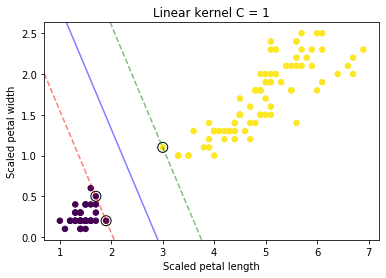

In [9]:
plotResults(svc_clf_lin, X_train, y_train, data["feature_names"][2], data["feature_names"][3], "Linear", 1)

In [10]:
img_pipeline = Pipeline([("mm_scaler", MinMaxScaler())])
X_transf = img_pipeline.fit_transform(X_train)

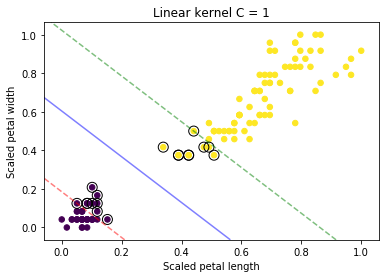

In [11]:
svc_clf_lin = SVC(C=1,kernel="linear")
svc_clf_lin.fit(X_transf, y_train)
plotResults(svc_clf_lin, X_transf, y_train, data["feature_names"][2], data["feature_names"][3], "Linear", 1)

In [12]:
def plotDecisionBoundary(svc, X, y, kernel, extra):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = svc.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0],X[:, 1],c=y)

    plt.title(f"SVM {kernel} kernel, {extra}")

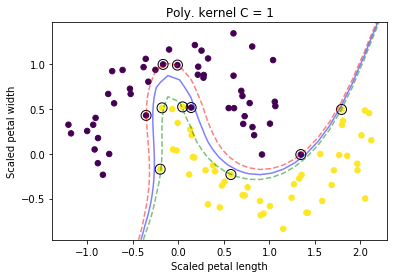

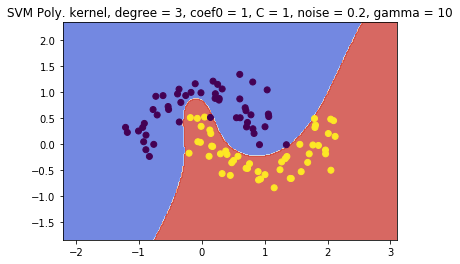

In [13]:
X_moon, y_moon = make_moons(noise=0.2, random_state=0)

svc_clf_poly = SVC(C=1,
                  kernel="poly",
                  degree = 3,
                  coef0 = 1,
                  gamma=10)
svc_clf_poly.fit(X_moon, y_moon)
plotResults(svc_clf_poly, X_moon, y_moon, data["feature_names"][2], data["feature_names"][3], "Poly.", 1)
plotDecisionBoundary(svc_clf_poly, X_moon, y_moon, "Poly.", "degree = 3, coef0 = 1, C = 1, noise = 0.2, gamma = 10")

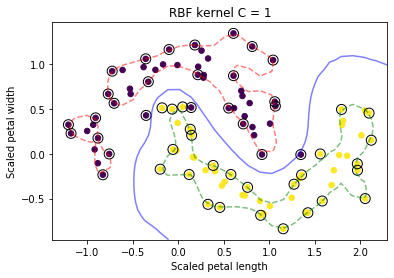

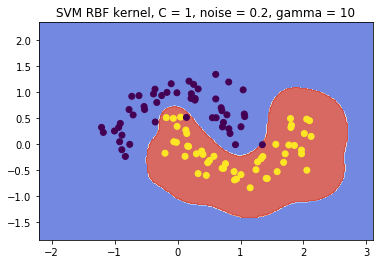

In [14]:
svc_clf_rbf = SVC(C=1,
                  kernel="rbf",
                  gamma=10)
svc_clf_rbf.fit(X_moon, y_moon)
plotResults(svc_clf_rbf, X_moon, y_moon, data["feature_names"][2], data["feature_names"][3], "RBF", 1)
plotDecisionBoundary(svc_clf_rbf, X_moon, y_moon, "RBF", "C = 1, noise = 0.2, gamma = 10")

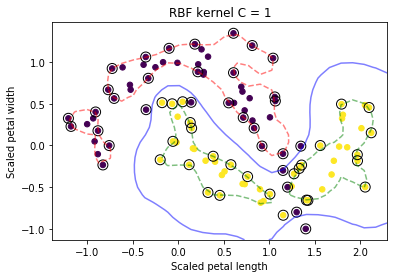

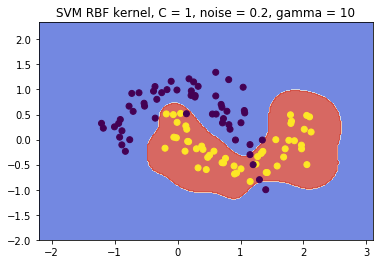

In [15]:
X_moon_new = np.append(X_moon,[[1.15,-0.1],[1.15,-0.3],[1.2,-0.5],[1.3,-0.8],[1.4,-1]]).reshape(-1,2)
y_moon_new = np.append(y_moon,[0,0,0,0,0])
svc_clf_rbf = SVC(C=1,
                  kernel="rbf",
                  gamma=10)
svc_clf_rbf.fit(X_moon_new, y_moon_new)
plotResults(svc_clf_rbf, X_moon_new, y_moon_new, data["feature_names"][2], data["feature_names"][3], "RBF", 1)
plotDecisionBoundary(svc_clf_rbf, X_moon_new, y_moon_new, "RBF", "C = 1, noise = 0.2, gamma = 10")

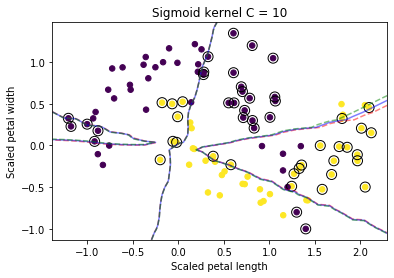

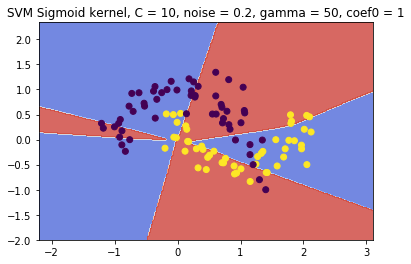

In [17]:
C = 10
gamma = 50
coef0 = 1
svc_clf_sig = SVC(C=C,
                  kernel="sigmoid",
                  gamma=gamma,
                 coef0 = coef0)
svc_clf_sig.fit(X_moon_new, y_moon_new)
plotResults(svc_clf_sig, X_moon_new, y_moon_new, data["feature_names"][2], data["feature_names"][3], "Sigmoid", C)
plotDecisionBoundary(svc_clf_sig, X_moon_new, y_moon_new, "Sigmoid", 
                     f"C = {C}, noise = 0.2, gamma = {gamma}, coef0 = {coef0}")